## 多层感知机
#### 多层感知机对XOR问题的探讨
能够解决XOR（异或）问题
通过学习两条线（蓝色和黄色）,最终对XOR问题进行二分类
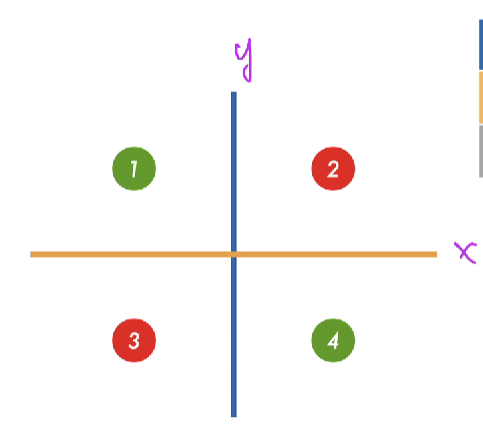
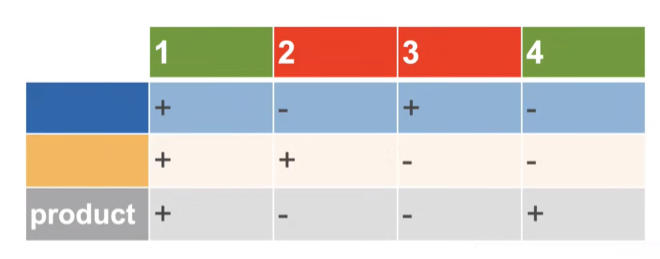
即分阶段，学习多个函数，并进行多个函数的组合，完成非线性的二分类任务<br>
**通过设置隐藏层超参数，进行不同的分类**
#### 单隐藏层——单分类
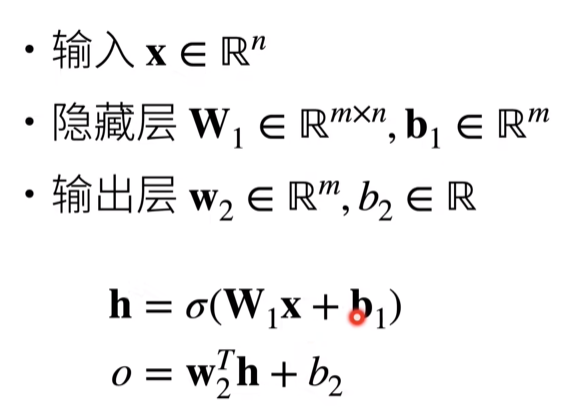
其中，$\sigma$是非线性的激活函数<br>
<br>
**为什么要用非线性的激活函数？**
> 输入是一个线性模型，而线性模型比较简单，实际问题比较复杂，因此不能达到最终的的正确结果，所以要在隐藏层中加入非线性的激活函数

常用激活函数 $sigmoid$<br>
因为存在指数运算，所以计算较慢

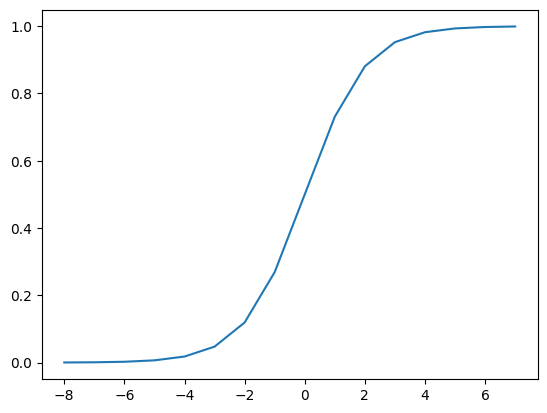

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-8, 8)
y = sigmoid(x)
plt.plot(x, y)

常用激活函数 $ReLU$<br>
优点：
- 计算较快

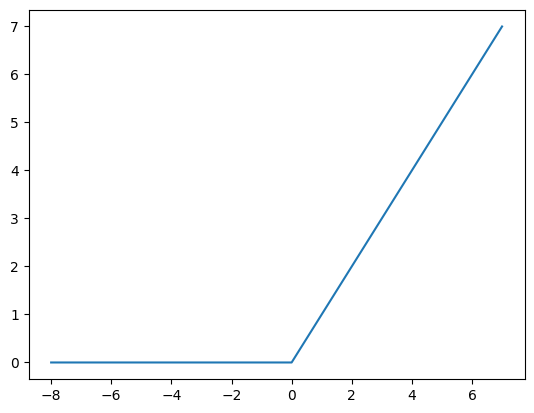

In [12]:
def ReLU(x):
    y = [max(0, xi) for xi in x]
    return y
x = np.arange(-8, 8)
y = ReLU(x)
plt.plot(x, y)

#### 多类分类
将最后的计算结果，放到一个softmax算子里面，再进行输出，得到一系列置信度
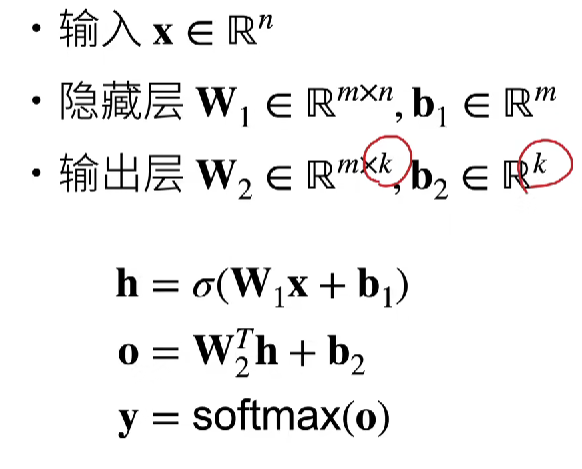
#### 多隐藏层
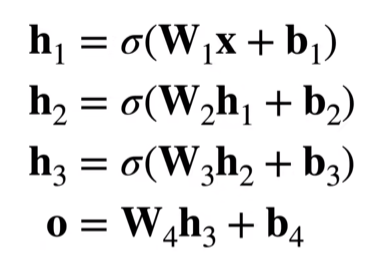
超参数：
- 每层隐藏层的大小
- 隐藏层层数

第一个隐藏层的输出为第二个隐藏层数输入，依次类推...，最后一层（输出）不需要激活函数<br>
对多隐藏层来说，一般而言，每层隐藏层的大小逐步减小，不断把信息进行提炼压缩
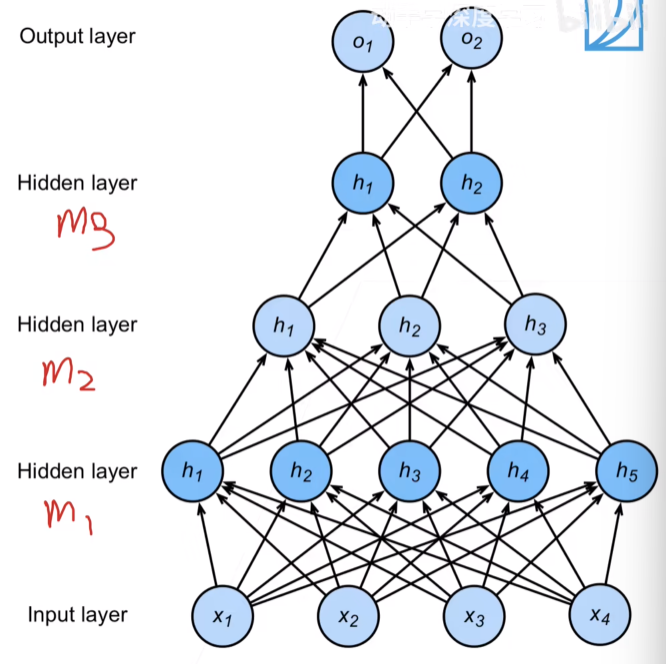

#### 总结
- 多层感知机使用隐藏层和激活函数来得到非线性模型
- 常用激活函数是Sigmoid、Tanh、ReLU（ReLU最常用）
- 使用softmax来处理多类分类
- 超参数为隐藏层数和各个隐藏层大小

**代码实现**

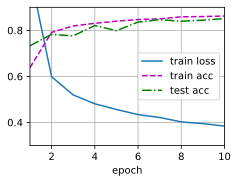

In [15]:
import torch
from torch import nn
from d2l import torch as d2l

########## 模型初始化设置 ##########
net = nn.Sequential(nn.Flatten(),   # 展平层
                   nn.Linear(784, 256),  # 隐藏层 每张图片28*28的输入 隐藏层设置为256的大小
                   nn.ReLU(),  # 加入激活函数
                   nn.Linear(256, 10))   # 输出层
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

lr, num_epochs = 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none') # 损失函数
trainer = torch.optim.SGD(net.parameters(), lr=lr) # 优化模型
########## 数据集的读入 ###########
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
########## 模型的训练 ##########
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)